<a href="url" target="_blank">  </a>

#  Investigating Fandango Movie Ratings

## Introduction

<a href="https://www.fandango.com/" target="_blank">Fandango Media, LLC</a> is an American ticketing company that sells movie tickets via their website as well as through their mobile app, as well as a provider of television and streaming media information, e.g., through its subsidiaries <a href="https://en.wikipedia.org/wiki/Flixster" target="_blank"> Flixster</a>, <a href="https://en.wikipedia.org/wiki/Movies.com" target="_blank"> Movies.com</a>, and <a href="https://en.wikipedia.org/wiki/Rotten_Tomatoes" target="_blank"> Rotten Tomatoes.</a>

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in this <a href="https://fivethirtyeight.com/features/fandango-movies-ratings/" target="_blank"> article</a> — a great piece of data journalism that's totally worth reading.

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.
Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:
The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

Picture bellow show this process:
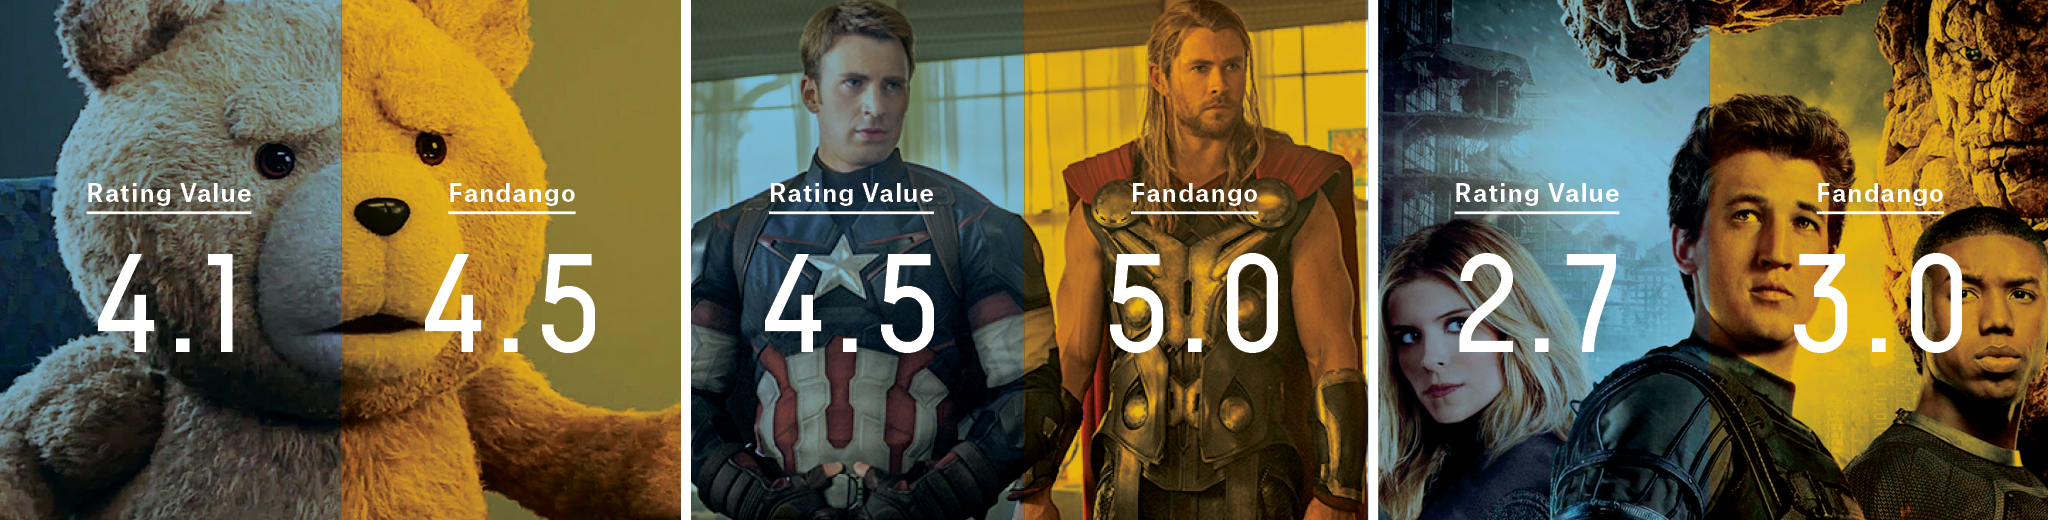

When Walt Hickey initially asked Fandango about its rounding practice, public relations coordinator Alison Ver Meulen said this in an email: “We always display stars rounded up to the nearest half star. So for example 3.6 stars would show up as 4 on our site.”

Walt Hickey calculate real rating without rounding numbers and plot actual  rating and  presented Fandango rating for comparison

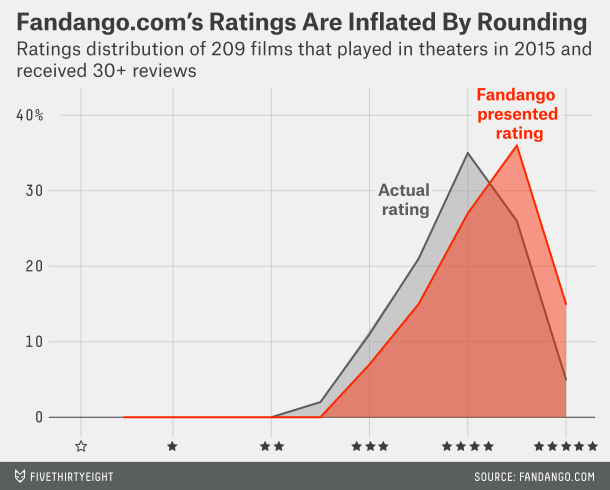

Both lines very left(negative) skewed - it means that value of rating has a tail that extends farther to the left.

The data from Hickey's analysis is publicly available on <a href="https://github.com/fivethirtyeight/data/tree/master/fandango" target="_blank">GitHub</a>.
The data after the analysis, represented by the ratings for movies released in 2016 and 2017, was collected by one of the <a href="https://www.dataquest.io/" target="_blank">Dataquest</a> team members and made publicly available on <a href="https://github.com/mircealex/Movie_ratings_2016_17" target="_blank"> GitHub</a>.



## Goal of project

The goal of project - analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis comparison data from Fandango 2014 - 2015 year (`"fandango_score_comparison.csv"`) and data of Movies rating for 2016 - 2017 year (`"movie_ratings_16_17.csv"`).

### First step 

Import required Python modules:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import pandas as pd
import re
from scipy.stats import skew
import seaborn as sns
# For display only three digits after comma  
pd.set_option('display.float_format','{:.2f}'.format)

### Second step
Import required data and explore it:

In [2]:
fandango_14_15 = pd.read_csv("fandango_score_comparison.csv")
movies_rating_16_17 = pd.read_csv("movie_ratings_16_17.csv")
fandango_14_15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [3]:
movies_rating_16_17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


The `fandango_14_15` contains 146 rows (films) and 22 columns, representing ratings from different sources for each film (Rotten Tomatoes, Metacritic, IMDB, Fandango) and user vote counts.

The `movies_rating_16_17` contains  214 entries (films) and 15 columns, representing the release year of the movie, critic and/or user ratings from the Rotten Tomatoes, Metacritic, IMDB, and Fandango. 

It is seen that NaN values absent in both dataframe.

### Expore `fandango_14_15`

Collect detailed information about dispersion data  form next columns  - `Fandango_Stars`, `Fandango_Ratingvalue`, `Fandango_votes`, `Fandango_Difference` and create their correlation matrix .

In [4]:
skew(fandango_14_15.Fandango_Stars)

-0.39090527278050147

In [5]:
fandango_14_15.Fandango_Stars.describe()

count   146.00
mean      4.09
std       0.54
min       3.00
25%       3.50
50%       4.00
75%       4.50
max       5.00
Name: Fandango_Stars, dtype: float64

In [6]:
skew(fandango_14_15.Fandango_Ratingvalue)

-0.3566097664080028

In [7]:
fandango_14_15.Fandango_Ratingvalue.describe()

count   146.00
mean      3.85
std       0.50
min       2.70
25%       3.50
50%       3.90
75%       4.20
max       4.80
Name: Fandango_Ratingvalue, dtype: float64

In [8]:
skew(fandango_14_15.Fandango_votes)

3.2308346238205377

In [9]:
fandango_14_15.Fandango_votes.describe()

count     146.00
mean     3848.79
std      6357.78
min        35.00
25%       222.25
50%      1446.00
75%      4439.50
max     34846.00
Name: Fandango_votes, dtype: float64

In [10]:
skew(fandango_14_15.Fandango_Difference)

0.018050856921336973

In [11]:
fandango_14_15.Fandango_Difference.describe()

count   146.00
mean      0.24
std       0.15
min       0.00
25%       0.10
50%       0.20
75%       0.40
max       0.50
Name: Fandango_Difference, dtype: float64

In [12]:
fandango_14_15[["Fandango_Stars", "Fandango_Ratingvalue", "Fandango_votes", "Fandango_Difference"]].corr()

,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
Fandango_Stars,1.00,0.96,0.36,0.38
Fandango_Ratingvalue,0.96,1.00,0.41,0.10
Fandango_votes,0.36,0.41,1.00,-0.08
Fandango_Difference,0.38,0.10,-0.08,1.00


**Preliminary results for `fandango_14_15`:***

* Skewness for  `Fandango_Stars` and  `Fandango_Ratingvalue` are negative, `Fandango_votes` - highly positive and `Fandango_Difference` near zero that mean what  `Fandango_Difference` has nearly normal distribution. Highly likely that  `Fandango_Stars` and `Fandango_Ratingvalue` have deliberate and artificial character for increasing rating and stars for increasing quantity of selling tickets and hence income.


* Correlation values `Fandango_Stars`, `Fandango_Ratingvalue` between values `Fandango_votes` and `Fandango_Difference` very weakness - that confirms the previous conclusion.


* All movies have high value that Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website because min for `fandango_14_15.Fandango_votes` equal 35.


The `fandango_14_15` hasn't separate column with year, we separate year of movie later.

### Expore `movies_rating_16_17`

In [13]:
movies_rating_16_17.year.value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [14]:
skew(movies_rating_16_17.fandango)

-0.6200146642112627

In [15]:
movies_rating_16_17.fandango.describe()

count   214.00
mean      3.89
std       0.52
min       2.50
25%       3.50
50%       4.00
75%       4.50
max       5.00
Name: fandango, dtype: float64

**Preliminary results for `movies_rating_16_17`:***
* Relative `fandango_14_15.Fandango_Ratingvalue` seen visible shift on the  left  in the  `movies_rating_16_17.fandango` and increasing percentile 50 and 75 values an max.

##  Isolating the necessary samples

The `fandango_14_15` dataframe hasn't separate `year` column unlike movies_rating_16_17. Create separate column `year` for `fandango_14_15` and extract value of year from `FILM` column. I using regular expression for extract year values and convert its to integer

In [16]:
#extract year pattern
year_patt = "(\(\d{4}\))" 
# remove parenthesis pattern
parth_pat = "[()]"

# insert new column `year`
fandango_14_15.insert(1, "year", fandango_14_15.FILM.str\
                      .extract(year_patt,expand = False))

# remove parenthesis 
fandango_14_15.year = fandango_14_15.year.str\
                        .replace(parth_pat, "", regex = True)

# convert string to integer
fandango_14_15.year = pd.to_numeric(fandango_14_15.year,
                                    errors="coerce").astype('int32')
fandango_14_15.year.value_counts()

2015    129
2014     17
Name: year, dtype: int64

I see that  the most of movies in `fandango_14_15` are 2015 year and for `movies_rating_16_17` the most of movies are 2016 year.  Isolate theirs years in each datafame. Isolate 2015 year and assign new  name `fandango_15` for dataframe  and check it :

In [17]:
fandango_15 = fandango_14_15[fandango_14_15.year == 2015]
fandango_15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 145
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        129 non-null    object 
 1   year                        129 non-null    int32  
 2   RottenTomatoes              129 non-null    int64  
 3   RottenTomatoes_User         129 non-null    int64  
 4   Metacritic                  129 non-null    int64  
 5   Metacritic_User             129 non-null    float64
 6   IMDB                        129 non-null    float64
 7   Fandango_Stars              129 non-null    float64
 8   Fandango_Ratingvalue        129 non-null    float64
 9   RT_norm                     129 non-null    float64
 10  RT_user_norm                129 non-null    float64
 11  Metacritic_norm             129 non-null    float64
 12  Metacritic_user_nom         129 non-null    float64
 13  IMDB_norm                   129 non

Isolate 2016 year and assign new name `movies_rating_16` for  dataframe  and check it:

In [18]:
movies_rating_16 = movies_rating_16_17[movies_rating_16_17.year == 2016]
movies_rating_16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         191 non-null    object 
 1   year          191 non-null    int64  
 2   metascore     191 non-null    int64  
 3   imdb          191 non-null    float64
 4   tmeter        191 non-null    int64  
 5   audience      191 non-null    int64  
 6   fandango      191 non-null    float64
 7   n_metascore   191 non-null    float64
 8   n_imdb        191 non-null    float64
 9   n_tmeter      191 non-null    float64
 10  n_audience    191 non-null    float64
 11  nr_metascore  191 non-null    float64
 12  nr_imdb       191 non-null    float64
 13  nr_tmeter     191 non-null    float64
 14  nr_audience   191 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 23.9+ KB


As I see data with correct year for each dataset  separate correctly.

Check values for skewness for this rows -  `Fandango_Stars` and  `Fandango_Ratingvalue` for `fandango_15` with `fandango` for movies_rating_16:

In [19]:
skew(fandango_15.Fandango_Stars)

-0.41836245240068665

In [20]:
skew(fandango_15.Fandango_Ratingvalue)

-0.38907639417112083

In [21]:
skew(movies_rating_16.fandango)

-0.6459635466459924

As seen fandango rating in 2016 year dispersion more shift left than in 2015 year. 

## Comparing KDE distribution Shapes for 2015 and 2016 years for fandango

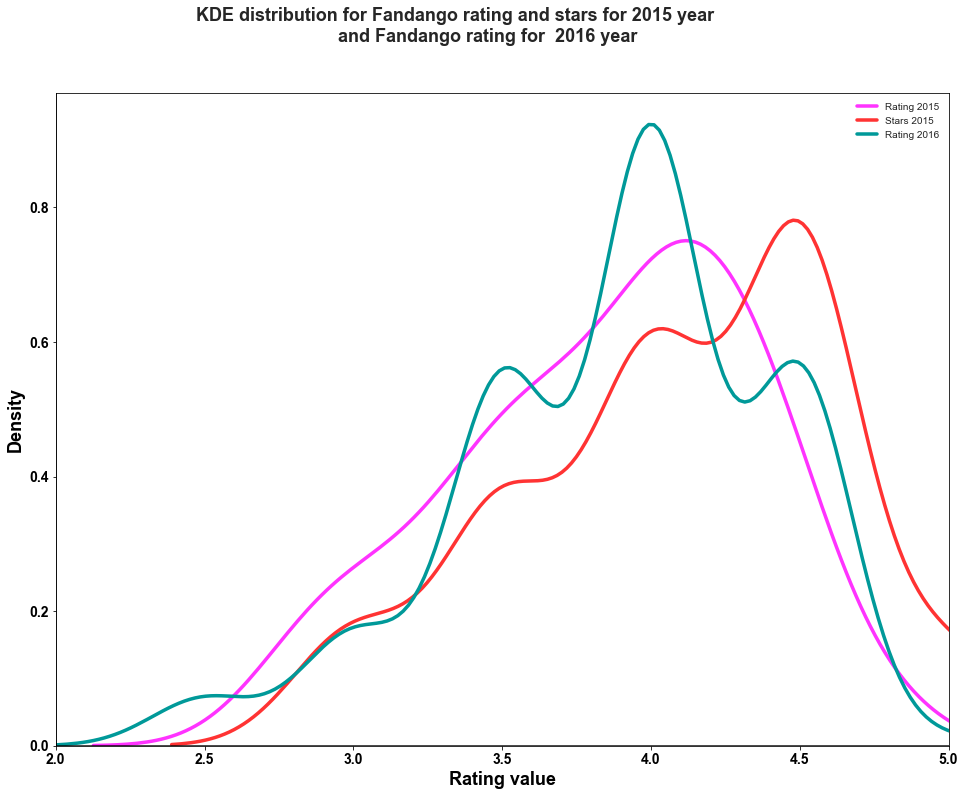

In [22]:
# Define fiigure and axis
fig, ax= plt.subplots(figsize=(16,12))

# Define dataframe, columns, labels, colors, limits
dfs = [fandango_15,fandango_15, movies_rating_16]
columns = ["Fandango_Ratingvalue", "Fandango_Stars", "fandango"]
labels = ["Rating 2015", "Stars 2015", "Rating 2016"]
colors = ["#FF33FF", "#FF3333", "#009999"]
x_start = 2.0
x_end = 5.0

# Set plot style
plt.style.use("seaborn-darkgrid")

# plot three KDE curves and their legends
for i, df in enumerate(dfs):
    ax = sns.kdeplot(data=df[columns[i]], label = labels[i], linewidth=3.5, c=colors[i] )
    ax.legend()
    ax.set_xlim(x_start, x_end)


# Set label x and y axis
ax.set_xlabel('Rating value', weight = "bold", fontsize = 18)
ax.set_ylabel('Density', weight = "bold", fontsize = 18, rotation =90)

#Set x and y coordinat lines
ax.axhline(0, color='black', linewidth=2, alpha=0.7)
ax.axvline(2, color='black', linewidth=2, alpha=0.7)

# Set font size labels for x and y sticks
plt.xticks(fontsize=14, weight = "bold" )
plt.yticks(fontsize=14, weight = "bold" );
plt.suptitle("KDE distribution for Fandango rating and stars for 2015 year\
             \nand Fandango rating for  2016 year",  weight = "bold", fontsize = 18)

plt.show()

As seen all three distribution have negative skewness, formally values rating  for maximum frequency and worst movies   little decreasing, but pick shift left. Probably changes for calculate rating after article were cosmetic character. I am not sure that rating values Fandango 2016 year are realistic values.

## Comparing Relative Frequencies

Seen at absolute frequency values for fandango rating for 2015 and 2016 year

In [23]:
fandango_15.Fandango_Ratingvalue.value_counts()

4.10    13
3.90    12
4.20    11
4.30     9
4.50     9
3.60     8
3.70     8
3.40     7
4.40     7
4.00     7
3.50     6
3.20     4
3.80     4
3.00     4
3.30     4
2.90     4
4.80     3
3.10     3
2.80     2
2.70     2
4.60     2
Name: Fandango_Ratingvalue, dtype: int64

In [24]:
fandango_15.Fandango_Ratingvalue.value_counts(normalize = True)*100

4.10   10.08
3.90    9.30
4.20    8.53
4.30    6.98
4.50    6.98
3.60    6.20
3.70    6.20
3.40    5.43
4.40    5.43
4.00    5.43
3.50    4.65
3.20    3.10
3.80    3.10
3.00    3.10
3.30    3.10
2.90    3.10
4.80    2.33
3.10    2.33
2.80    1.55
2.70    1.55
4.60    1.55
Name: Fandango_Ratingvalue, dtype: float64

In [25]:
fandango_15.Fandango_Stars.value_counts()

4.50    49
4.00    37
3.50    23
3.00    11
5.00     9
Name: Fandango_Stars, dtype: int64

In [26]:
fandango_15.Fandango_Stars.value_counts(normalize = True)

4.50   0.38
4.00   0.29
3.50   0.18
3.00   0.09
5.00   0.07
Name: Fandango_Stars, dtype: float64

In [27]:
movies_rating_16.fandango.value_counts()

4.00    77
4.50    47
3.50    46
3.00    14
2.50     6
5.00     1
Name: fandango, dtype: int64

In [28]:
movies_rating_16.fandango.value_counts(normalize = True)*100

4.00   40.31
4.50   24.61
3.50   24.08
3.00    7.33
2.50    3.14
5.00    0.52
Name: fandango, dtype: float64

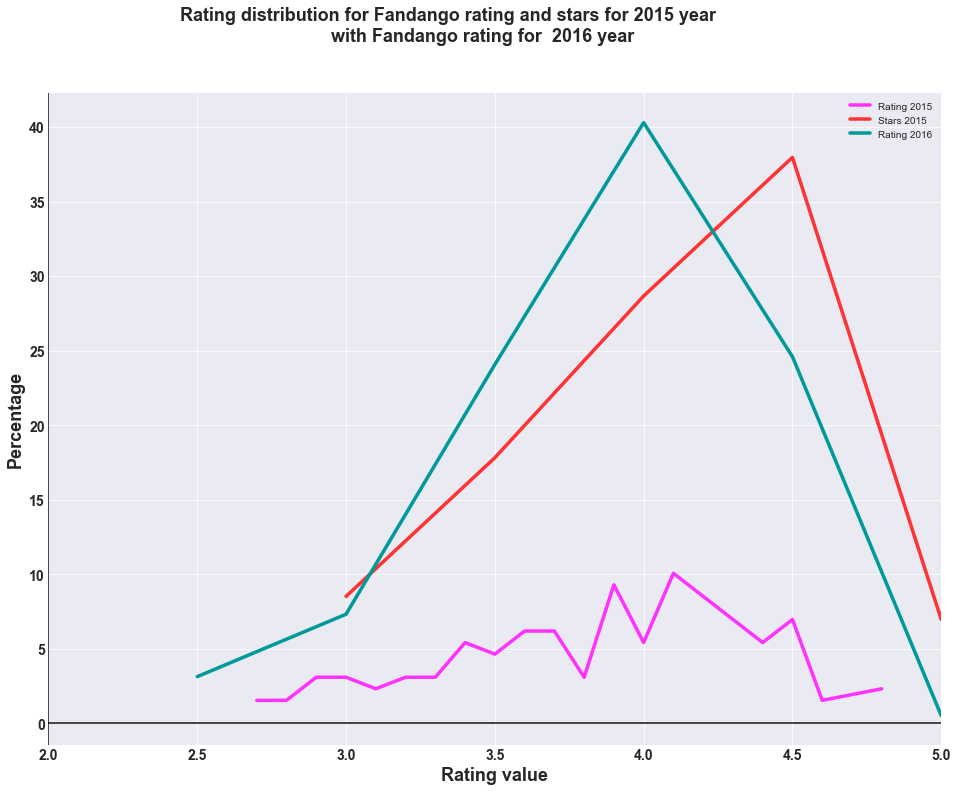

In [29]:
fig, ax= plt.subplots(figsize=(16,12))
# Define dataframe, columns, labels, colors, limits
dfs = [fandango_15,fandango_15, movies_rating_16]
columns = ["Fandango_Ratingvalue", "Fandango_Stars", "fandango"]
labels = ["Rating 2015", "Stars 2015", "Rating 2016"]
colors = ["#FF33FF", "#FF3333", "#009999"]
x_start = 2.0
x_end = 5.0
# Set plot style
plt.style.use("seaborn-darkgrid")

# plot three lines curves and their legends
for i, df in enumerate(dfs):
    ax = sns.lineplot(data = df[columns[i]].value_counts(normalize = True)\
                      .sort_index()*100, label = labels[i], color = colors[i],
                      linewidth = 3.5)
    ax.legend()
    ax.set_xlim(x_start, x_end)


# Set label x and y axis
ax.set_xlabel('Rating value', weight = "bold", fontsize = 18)
ax.set_ylabel('Percentage', weight = "bold", fontsize = 18)

#Set x and y coordinat lines
ax.axhline(0, color='black', linewidth=2, alpha=0.7)
ax.axvline(2, color='black', linewidth=2, alpha=0.7)

# Set font size labels for x and y sticks
plt.xticks(fontsize=14, weight = "bold" )
plt.yticks(fontsize=14, weight = "bold" );
plt.suptitle("Rating distribution for Fandango rating and stars for 2015 year\
             \n with Fandango rating for  2016 year",  weight = "bold", fontsize = 18)

plt.show()

Look at this plot and numerical value above I seen that:


* After article  scale `Fandango_Ratingvalue` in 2015 year with  graduated step = 0.1 replaced to scale  with  graduated step = 0.5 for `fandango` in 2016 year  that very seem to scale for `Fandango_Stars`.


* In fact article  dispersion `fandango` in 2016 year  practically repeats  `Fandango_Stars` in 2016 year with little left shifting.


## Determining the direction of the change from 2015 to 2016 year

Create dataframe, view and create plotbar for it:

In [30]:
mean_mode = [
        [2015,fandango_15.Fandango_Ratingvalue.mean(), 
         fandango_15.Fandango_Ratingvalue.median(),
         fandango_15.Fandango_Ratingvalue.mode()[0]],
        [2016, movies_rating_16.fandango.mean(),
         movies_rating_16.fandango.median(), 
         movies_rating_16.fandango.mode()[0]]]

mean_mode = pd.DataFrame(mean_mode,
                         columns = ["year", 'mean', "median", "mode" ])
mean_mode

,year,mean,median,mode
0,2015,3.85,3.90,4.10
1,2016,3.89,4.00,4.00


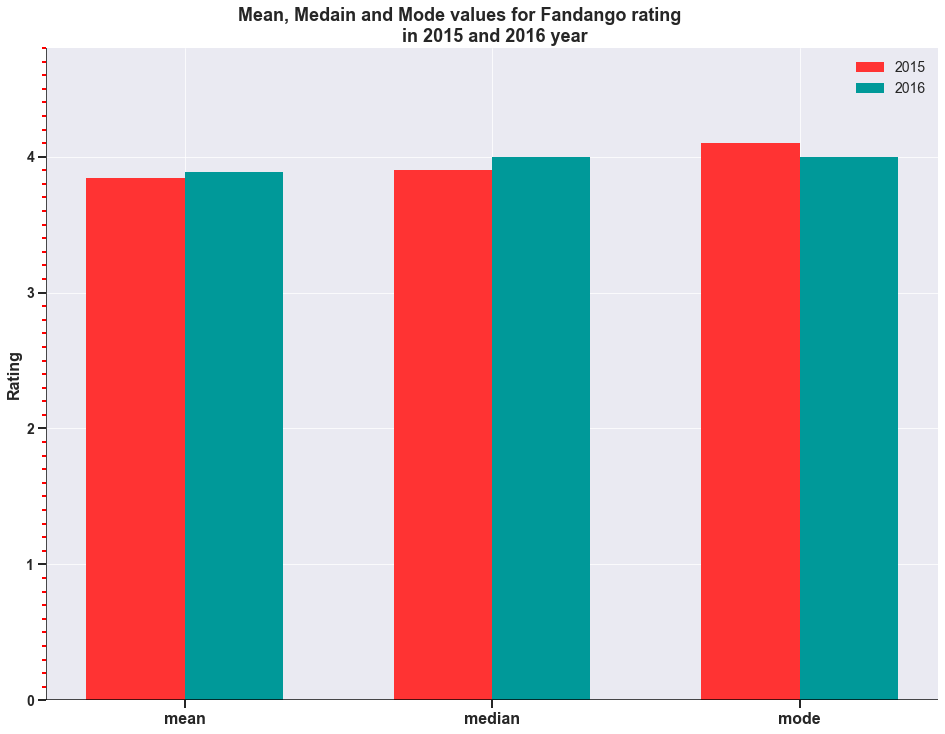

In [31]:
# Plot bar mean_mode - a little remember matplot.lib)
labels = list(mean_mode.columns)[1:]
#Extract values from rows
values_2015 = list(mean_mode.iloc[0,1:])
values_2016 = list(mean_mode.iloc[1,1:])
#Defining x coordinates for bar
x = np.arange(len(labels))
width = .32
# Draw bars
fig, ax = plt.subplots(figsize = (16,12))
plt.style.use("seaborn-darkgrid")
rect_2015 = ax.bar(x - width/2, values_2015, width, label='2015',
                   color = "#FF3333")
rect_2016 = ax.bar(x + width/2, values_2016, width, label='2016', 
                  color = "#009999" )
# Set lables and titles
ax.set_ylabel('Rating', fontsize = 16, weight = "bold")
ax.set_title('Mean, Medain and Mode values for Fandango rating\
             \n in 2015 and 2016 year', fontsize = 18, weight = "bold" )

ax.set_xticks(x)
ax.set_ylim(0, 4.8)
ax.set_xticklabels(labels, fontsize = 16, weight = "bold" )
ax.legend(fontsize = 14)

#Set x and y coordinat lines
ax.axhline(0, color='black', linewidth=2, alpha=0.7)
ax.axvline(ax.get_xlim()[0], color='black', linewidth=2, alpha=0.7)

# Set minor labels
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=8)
ax.tick_params(which='minor', length=4, color='r')

plt.yticks(fontsize=14, weight = "bold" );
plt.show()

As seen values for mean, median and mode  almost equal for both 2015 and 2016 year.

## Comparing Fandango rating with different movie rating aggregators for 2016 year.

Alex Olteanu wrote  <a href="https://www.freecodecamp.org/news/whose-reviews-should-you-trust-imdb-rotten-tomatoes-metacritic-or-fandango-7d1010c6cf19/" target="_blank">article</a> about comparison different movies rating system -   IMDB, `Rotten Tomatoes`, `Metacritic`, and `Fandango`. In this article Alex Olteanu recommended using `Metacritic’s metascore` rating.

I'm not going to dispute his decision, but I want to look at the distribution of ratings of various aggregators and their total statistics for 2015 and 2016 year.

Create boxplot for 2015 and 2016 year using matplotlib and seaborn, I don't use pandas boxplot because I can't to solve porblem with filling boxes in the custom color:

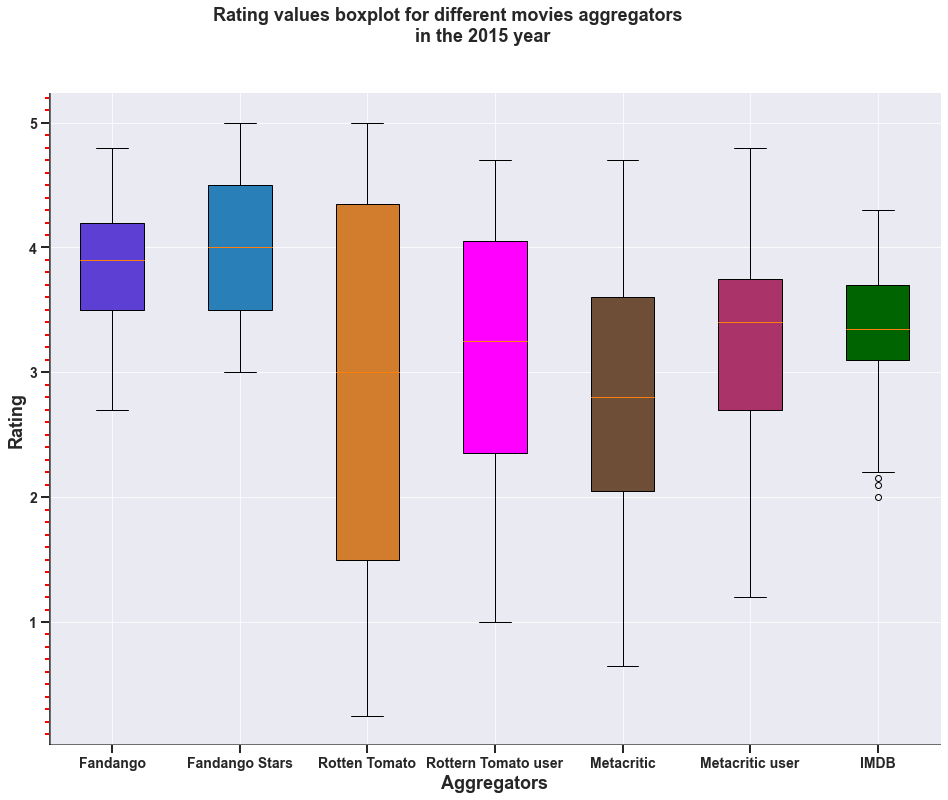

In [32]:
# Plot 2015 year boxplot using matplotib for correct output custom colors.
fig, ax= plt.subplots(figsize=(16,12))
plt.style.use("seaborn-darkgrid")
columns_2015 = ['Fandango_Ratingvalue', 'Fandango_Stars', 'RT_norm', 'RT_user_norm', 
                    'Metacritic_norm', 'Metacritic_user_nom','IMDB_norm']
labels_2015 = ["Fandango", 'Fandango Stars', "Rotten Tomato", "Rottern Tomato user",
               "Metacritic", "Metacritic user", "IMDB"]
colors_2015 = ["#5D3FD3", "#2980B9", "#D27D2D", "#FF00FF", "#6F4E37", "#AA336A","#006400"]

# Use standard pandas boxplot
boxplot = ax.boxplot(fandango_15[columns_2015],
                     patch_artist=True,  # fill with color
                     labels=labels_2015)  # will be used to label x-ticks

# Fill boxplot with custom colors
for patch, color in zip(boxplot['boxes'], colors_2015):
        patch.set_facecolor(color)

# Set x and y labels and ticks
ax.set_xlabel('Aggregators', weight = "bold", fontsize = 18)
ax.set_ylabel('Rating', weight = "bold", fontsize = 18, rotation =90)

# Set minor labels
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=8)
ax.tick_params(which='minor', length=4, color='r')

#Set x and y coordinate  lines
ax.axhline(ax.get_ylim()[0], color='black', linewidth=2.5, alpha=0.7)
ax.axvline(ax.get_xlim()[0], color='black', linewidth=2.5, alpha=0.7)

# Set font size labels for x and y sticks
plt.xticks(fontsize=14, weight = "bold" )
plt.yticks(fontsize=14, weight = "bold" );
plt.suptitle("Rating values boxplot for different movies aggregators\
             \n in the 2015 year",  weight = "bold", 
             fontsize = 18)

plt.show()

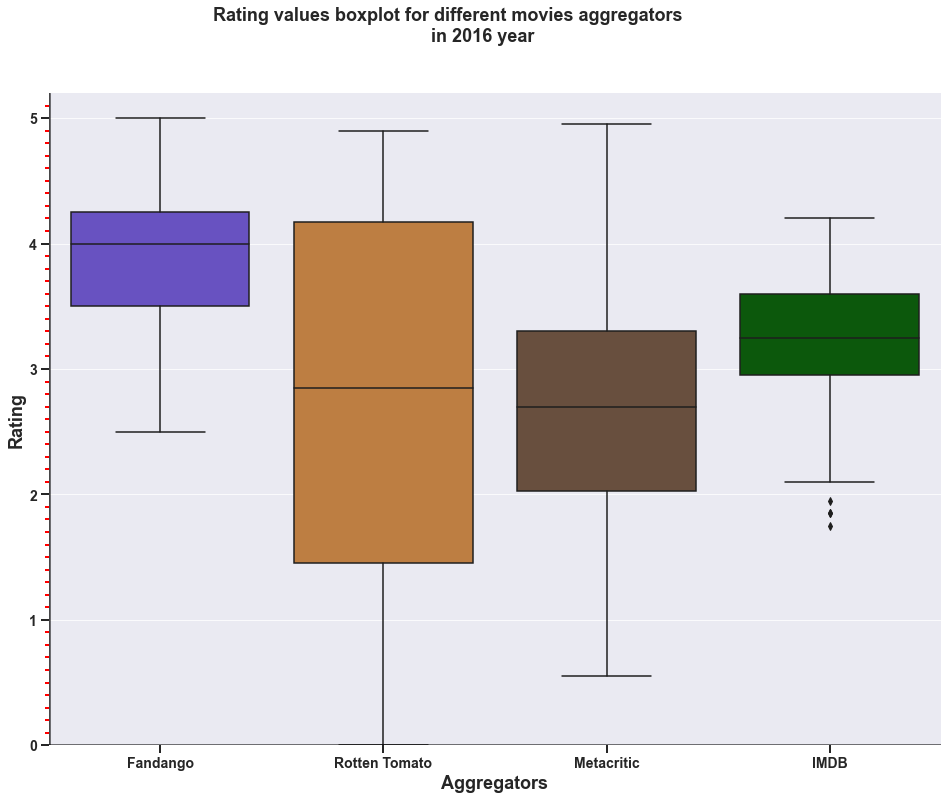

In [33]:
# Plot 2016 year boxplot using seaborn
fig, ax= plt.subplots(figsize=(16,12))
plt.style.use("seaborn-darkgrid")
columns_2016 = ["fandango", "n_tmeter", "n_metascore", "n_imdb", ]
pallete_2016 = {"fandango":"#5D3FD3", "n_tmeter":"#D27D2D", "n_metascore":"#6F4E37",
           "n_imdb":"#006400"}
labels_2016 = ["Fandango", "Rotten Tomato", "Metacritic", "IMDB"]

ax.set_xlim(0,5.0)
ax.set_ylim(0,5.2)

# Experiment with seaborn and melt dataframe
ax = sns.boxplot(x = "variable", y = "value", 
                 data = pd.melt(movies_rating_16[columns_2016].copy()), 
                 palette = pallete_2016)

# Set x and y labels and ticks
ax.set_xticklabels(labels_2016)
ax.set_xlabel('Aggregators', weight = "bold", fontsize = 18)
ax.set_ylabel('Rating', weight = "bold", fontsize = 18, rotation =90)

# Set minor labels
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=8)
ax.tick_params(which='minor', length=4, color='r')


#Set x and y coordinat lines
ax.axhline(0, color='black', linewidth=2.5, alpha=0.7)
ax.axvline(-.5, color='black', linewidth=2.5, alpha=0.7)

# Set font size labels for x and y sticks
plt.xticks(fontsize=14, weight = "bold" )
plt.yticks(fontsize=14, weight = "bold" );
plt.suptitle("Rating values boxplot for different movies aggregators\
             \n in 2016 year",  weight = "bold", 
             fontsize = 18)

plt.show()

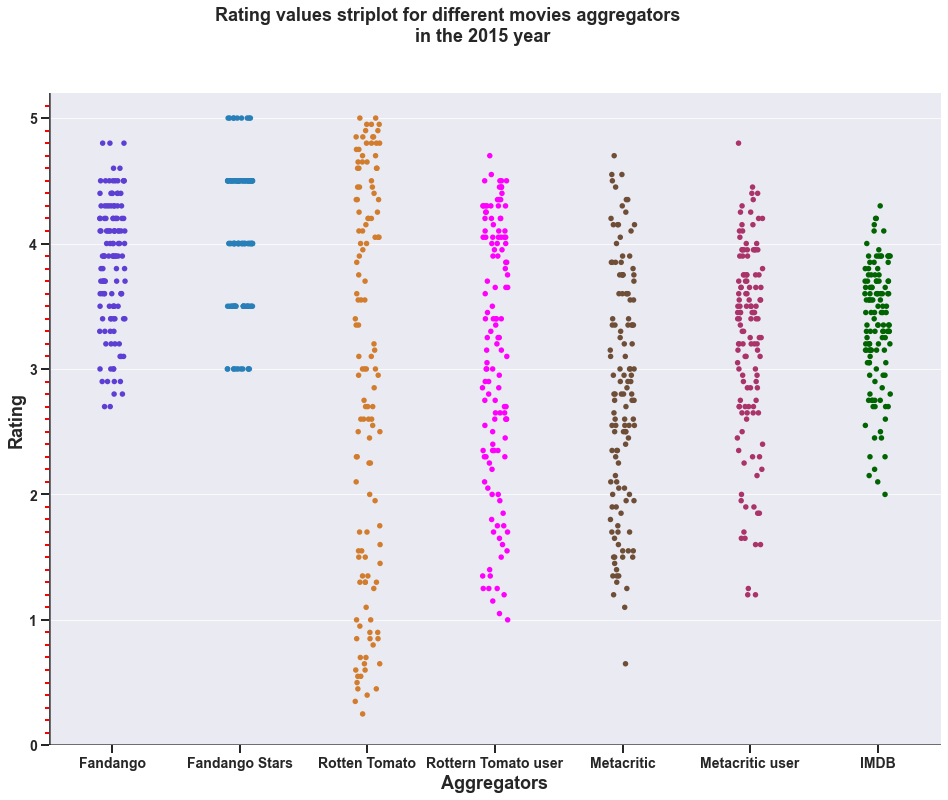

In [34]:
# Striplot 2015
fig, ax= plt.subplots(figsize=(16,12))
plt.style.use("seaborn-darkgrid")

columns_2015 = ['Fandango_Ratingvalue', 'Fandango_Stars', 'RT_norm', 'RT_user_norm', 
                    'Metacritic_norm', 'Metacritic_user_nom','IMDB_norm']
labels_2015 = ["Fandango", 'Fandango Stars', "Rotten Tomato", "Rottern Tomato user",
               "Metacritic", "Metacritic user", "IMDB"]
palete_2015 = {'Fandango_Ratingvalue' : "#5D3FD3",
               'Fandango_Stars': "#2980B9", 
               'RT_norm': "#D27D2D", 
               'RT_user_norm': "#FF00FF", 
                'Metacritic_norm': "#6F4E37", 
               'Metacritic_user_nom': "#AA336A",
               'IMDB_norm': "#006400"}

# melt dataframe
ax = sns.stripplot(x = "variable", y = "value", 
                data = pd.melt(fandango_15[columns_2015].copy()),
                palette = palete_2015, size = 5.5, dodge = True )
                
# Set x and y labels and ticks
ax.set_xticklabels(labels_2015)
ax.set_xlabel('Aggregators', weight = "bold", fontsize = 18)
ax.set_ylabel('Rating', weight = "bold", fontsize = 18, rotation =90)

# Set minor labels
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=8)
ax.tick_params(which='minor', length=4, color='r')

#Set x and y coordinate  lines
ax.set_ylim(0, 5.2)
ax.axhline(0, color='black', linewidth=2.5, alpha=0.7)
ax.axvline(ax.get_xlim()[0], color='black', linewidth=2.5, alpha=0.7)

# Set font size labels for x and y sticks
plt.xticks(fontsize=14, weight = "bold" )
plt.yticks(fontsize=14, weight = "bold" );
plt.suptitle("Rating values striplot for different movies aggregators\
             \n in the 2015 year",  weight = "bold", 
             fontsize = 18)

plt.show()

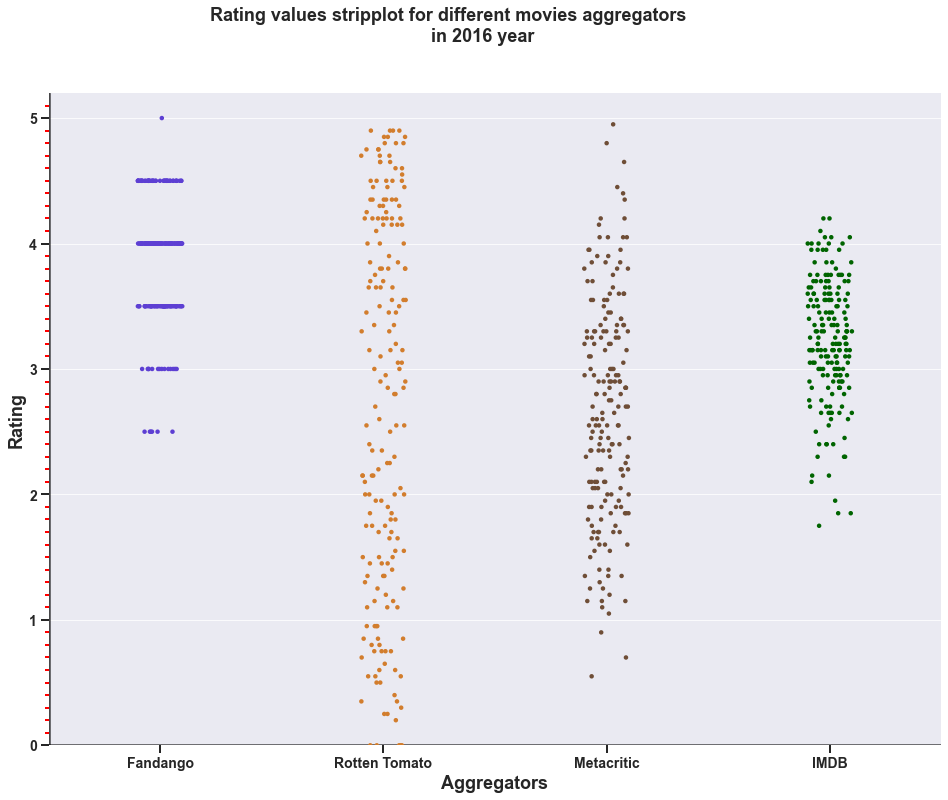

In [35]:
fig, ax= plt.subplots(figsize=(16,12))
plt.style.use("seaborn-darkgrid")
ax.set_ylim(0, 5.2)
columns_2016 = ["fandango", "n_tmeter", "n_metascore", "n_imdb", ]
pallete_2016 = {"fandango":"#5D3FD3", "n_tmeter":"#D27D2D", "n_metascore":"#6F4E37",
           "n_imdb":"#006400"}
labels_2016 = ["Fandango", "Rotten Tomato", "Metacritic", "IMDB"]

# Melt dataframe
ax = sns.stripplot(x = "variable", y = "value", 
                 data = pd.melt(movies_rating_16[columns_2016].copy()), 
                 palette = pallete_2016, size = 4.5, dodge = True)

# Set x and y labels and ticks
ax.set_xticklabels(labels_2016)
ax.set_xlabel('Aggregators', weight = "bold", fontsize = 18)
ax.set_ylabel('Rating', weight = "bold", fontsize = 18, rotation =90)

# Set minor labels
ax.yaxis.set_minor_locator(AutoMinorLocator(10))
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=8)
ax.tick_params(which='minor', length=4, color='r')


#Set x and y coordinat lines
ax.axhline(0, color='black', linewidth=2.5, alpha=0.7)
ax.axvline(-0.5, color='black', linewidth=2.5, alpha=0.7)

# Set font size labels for x and y sticks
plt.xticks(fontsize=14, weight = "bold" )
plt.yticks(fontsize=14, weight = "bold" );
plt.suptitle("Rating values stripplot for different movies aggregators\
             \n in 2016 year",  weight = "bold", 
             fontsize = 18)

plt.show()

## Calculation essential statistical values  for 2015 and 2016 year

Calculate essential statistical values  for 2015 and 2016 year - to be honest, I didn't expect so much code for such a simple table.

In [36]:
# Define list for aggregation values
aggr_15 = ["Fandango_Stars", "Fandango_Ratingvalue", "RT_norm", 
           "Metacritic_norm", "IMDB_norm" ]

# Create dataframe with essentials aggregation values min, mean, median, max
f15_aggr = fandango_15[aggr_15].aggregate([np.min,  np.mean, 
                                           np.median, np.max])

# Rename columns for future merge with 2015 year data and transpose dataframe
aggregator_2015 = {"Fandango_Stars": "Fandango stars" , 
                   "Fandango_Ratingvalue": "Fandango rating", 
                   "RT_norm": "Rotten Tomatoes normalized to 5" , 
                   "Metacritic_norm" : "Metacritic normalized to 5", 
                   "IMDB_norm": "IMDB normalized to 5"}
f15_aggr = f15_aggr.rename(columns = aggregator_2015).T.reset_index()

# Rename columns for statistical data after transpose
stats_data_2015 = {"index":"Aggregator Name",
                   "amin": "Minimal in 2015 ",
                   "mean": "Mean in 2015",
                   "median": "Median in 2015",
                   "amax": "Maximum in 2015"}
f15_aggr = f15_aggr.rename(columns = stats_data_2015)

# Extract  mode and mode repeat numbers from fandango_15
mode = []
mode_repeat = []
mode_repeat_perc = []
columns_name = ["Mode in 2015", "Mode repeat in 2015", 
                "Mode repeat in 2015 %"]
for column in aggr_15:
    # Frequently rating value
    mode.append(fandango_15[column].value_counts().index[0])
    # Frequently number of repeating
    mode_repeat.append(fandango_15[column].value_counts().values[0])
    # Ration frequently number of repeating divided to total film numbers
    mode_repeat_perc.append(100 * fandango_15[column].value_counts().values[0]\
                            /len(fandango_15[column]))

# Insert new columns in f15_aggr
values = [mode, mode_repeat, mode_repeat_perc]
for i, value in enumerate(values):
    f15_aggr.insert(len(f15_aggr.columns), columns_name[i], value )

f15_aggr

,Aggregator Name,Minimal in 2015,Mean in 2015,Median in 2015,Maximum in 2015,Mode in 2015,Mode repeat in 2015,Mode repeat in 2015 %
0,Fandango stars,3.00,4.09,4.00,5.00,4.50,49,37.98
1,Fandango rating,2.70,3.85,3.90,4.80,4.10,13,10.08
2,Rotten Tomatoes normalized to 5,0.25,2.92,3.00,5.00,4.85,4,3.10
3,Metacritic normalized to 5,0.65,2.84,2.80,4.70,3.35,6,4.65
4,IMDB normalized to 5,2.00,3.34,3.35,4.30,3.60,9,6.98


In [37]:
# Define list for aggregation values
aggr_16 = ['fandango', 'n_tmeter', 'n_metascore', 'n_imdb']

# Create dataframe with essentials aggregation values min, mean, median, max
mr16_aggr = movies_rating_16[aggr_16].aggregate([np.min,  np.mean, 
                                           np.median, np.max])

# Rename columns for future merge with 2016 year data and transpose dataframe
aggregator_2016 = {"fandango": "Fandango rating", 
                   "n_tmeter": "Rotten Tomatoes normalized to 5" , 
                   "n_metascore" : "Metacritic normalized to 5", 
                   "n_imdb": "IMDB normalized to 5"}

mr16_aggr = mr16_aggr.rename(columns = aggregator_2016).T.reset_index()

# Rename columns for statistical data after transpose
stats_data_2016 = {"index":"Aggregator Name",
                   "amin": "Minimal in 2016 ",
                   "mean": "Mean in 2016",
                   "median": "Median in 2016",
                   "amax": "Maximum in 2016"}
mr16_aggr = mr16_aggr.rename(columns = stats_data_2016)

# Extract  mode and mode repeat numbers from fandango_15
mode = []
mode_repeat = []
mode_repeat_perc = []
columns_name = ["Mode in 2016", "Mode repeat in 2016", 
                "Mode repeat in 2016 %"]
for column in aggr_16:
    # Frequently rating value
    mode.append(movies_rating_16[column].value_counts().index[0])
    # Frequently number of repeating
    mode_repeat.append(movies_rating_16[column].value_counts().values[0])
    # Ration frequently number of repeating divided to total film numbers
    mode_repeat_perc.append(100 * movies_rating_16[column].value_counts().values[0]\
                            /len(movies_rating_16[column]))

# Insert new columns in mr16_aggr
values = [mode, mode_repeat, mode_repeat_perc]
for i, value in enumerate(values):
    mr16_aggr.insert(len(mr16_aggr.columns), columns_name[i], value )

mr16_aggr

,Aggregator Name,Minimal in 2016,Mean in 2016,Median in 2016,Maximum in 2016,Mode in 2016,Mode repeat in 2016,Mode repeat in 2016 %
0,Fandango rating,2.50,3.89,4.00,5.00,4.00,77,40.31
1,Rotten Tomatoes normalized to 5,0.00,2.72,2.85,4.90,4.20,7,3.66
2,Metacritic normalized to 5,0.55,2.68,2.70,4.95,2.90,7,3.66
3,IMDB normalized to 5,1.75,3.23,3.25,4.20,3.15,13,6.81


Create a summary table by merging data for 2015 and 2016:

In [38]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

movies_15_16_stat_data = pd.merge(f15_aggr, mr16_aggr, 
                                  how = "left",
                                  on =['Aggregator Name', 
                                       'Aggregator Name']).\
                                fillna(value = "Absent data")

movies_15_16_stat_data

,Aggregator Name,Minimal in 2015,Mean in 2015,Median in 2015,Maximum in 2015,Mode in 2015,Mode repeat in 2015,Mode repeat in 2015 %,Minimal in 2016,Mean in 2016,Median in 2016,Maximum in 2016,Mode in 2016,Mode repeat in 2016,Mode repeat in 2016 %
0,Fandango stars,3.00,4.09,4.00,5.00,4.50,49,37.98,Absent data,Absent data,Absent data,Absent data,Absent data,Absent data,Absent data
1,Fandango rating,2.70,3.85,3.90,4.80,4.10,13,10.08,2.5,3.89,4.0,5.0,4.0,77.0,40.31
2,Rotten Tomatoes normalized to 5,0.25,2.92,3.00,5.00,4.85,4,3.10,0.0,2.72,2.85,4.9,4.2,7.0,3.66
3,Metacritic normalized to 5,0.65,2.84,2.80,4.70,3.35,6,4.65,0.55,2.68,2.7,4.95,2.9,7.0,3.66
4,IMDB normalized to 5,2.00,3.34,3.35,4.30,3.60,9,6.98,1.75,3.23,3.25,4.2,3.15,13.0,6.81


##  Conclusion

* I see from plots and tables above what the actual ratings in Fandango’s HTML were hugely inflated, presumably because of some specific approach for gathering ratings, or an intentional filtering. Given that Fandango also sells tickets, it doesn't look to be just a "system bug".

* The shapes of Fandango’s movie rating distributions for both 2015 and 2016 are strongly left skewed, but the one for 2016 is a more left shifted.

* The summary statistics: the mean and the mode have decreased insignificantly, while the median remained the same. In 2016, there were less movies with the highest Fandango’s ratings 5 and 4.5, and appeared very few movies with the rating 2.5, while in 2015, the minimum was 3. In both cases, the predominant majority of movies are rated from 3.5 to 4.5.

* From a wider prospective, even if in 2016 Fandango's rating distribution has slightly shifted to the left, towards more realistic values, it still looks totally unrealistic with respect to the other aggregators. In addition, all the summary statistics are evidently higher for Fandango both in 2015 and 2016.

* The most reliable aggregator for checking a movie rating is Metacritic (expert scores), because of its almost normal distribution shape.

* Final conclusion: Fandango's rating system has been insignificantly improved in 2016, but remained rather biased anyway. Possible reason - dependences between income from sales ticket that forces Fandango assign rating `5` value for full bullshit movies for increasing their revenue. Use other aggregators for getting more objective rating of movies.



Created on Apr 24, 2021

@author: Vadim Maklakov, used some ideas from public Internet resources.

© 3-clause BSD License

Software environment: Debian 10.9, Python 3.8.7

required next imported python modules:

numpy

matplotlib

pandas

re

scipy

seaborn 